In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('laptop_data.csv')

## 1. Data Preprocessing

In [5]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [6]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [9]:
df.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [10]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


## Drop useless Columns

In [12]:
# Droping Columns
df.drop(columns=['Unnamed: 0'],inplace=True)

In [13]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [17]:
## Treatment of Columns data
df['Ram'] = df['Ram'].str.replace('GB',' ')
df['Weight'] = df['Weight'].str.replace('kg',' ')

In [18]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200


In [20]:
## Change Datatype of Columns
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


## 2. EDA

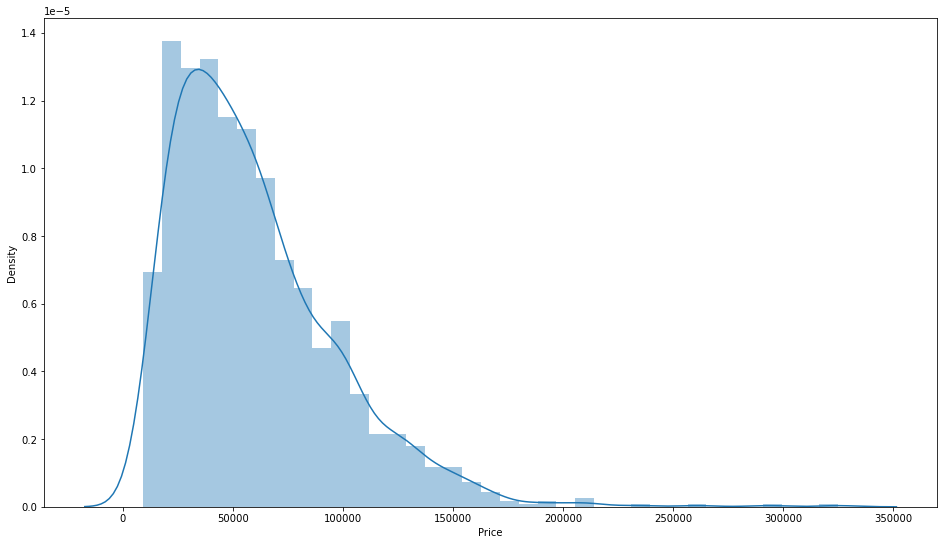

In [25]:
plt.figure(figsize=(16,9))
sns.distplot(df['Price'])
plt.show()

In [26]:
df['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Fujitsu        3
Google         3
LG             3
Chuwi          3
Huawei         2
Name: Company, dtype: int64

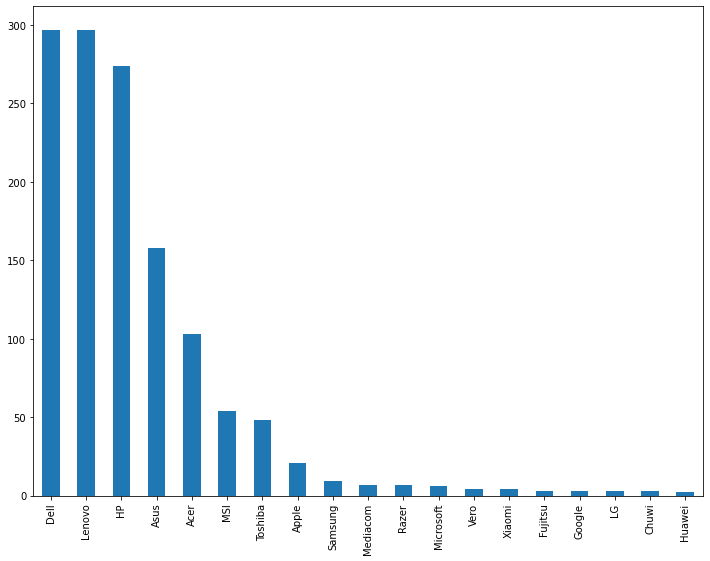

In [29]:
plt.figure(figsize=(12,9))
df['Company'].value_counts().plot(kind = 'bar')
plt.show()

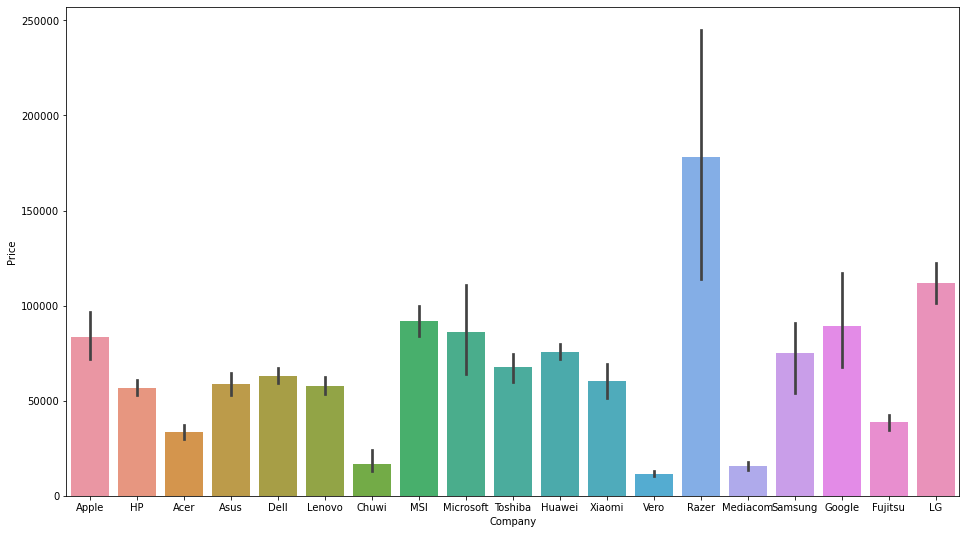

In [32]:
plt.figure(figsize=(16,9))
sns.barplot(x= df['Company'],y = df['Price'])
plt.show()

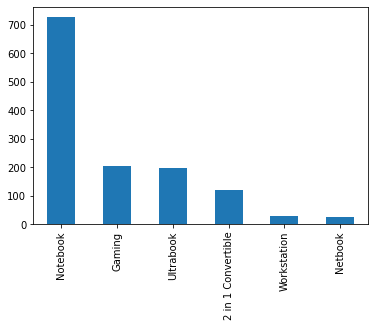

In [34]:
df['TypeName'].value_counts().plot(kind = 'bar')
plt.show()

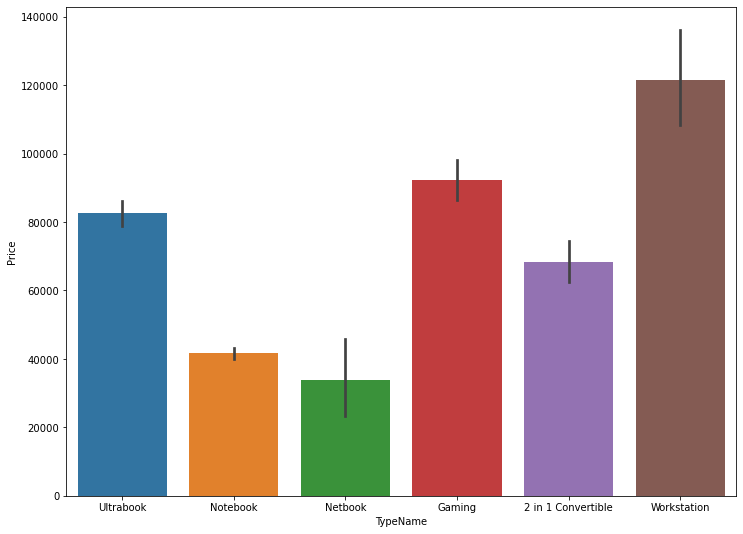

In [36]:
plt.figure(figsize=(12,9))
sns.barplot(x= df['TypeName'],y = df['Price'])
plt.show()

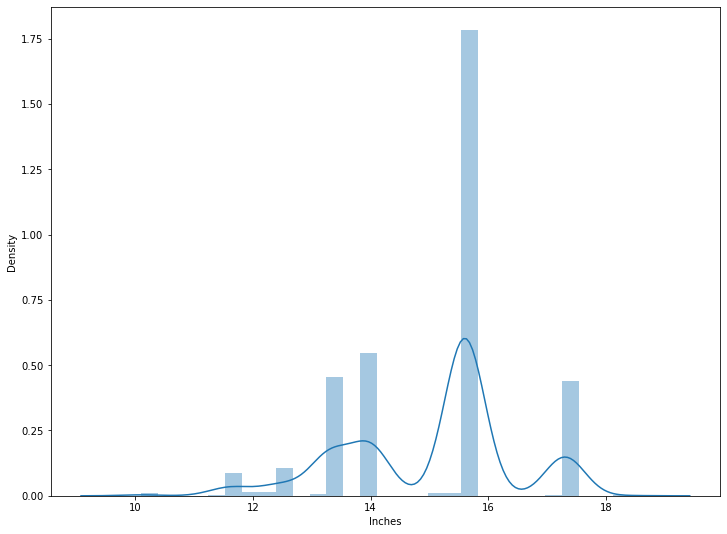

In [39]:
plt.figure(figsize=(12,9))
sns.distplot(df['Inches'])
plt.show()

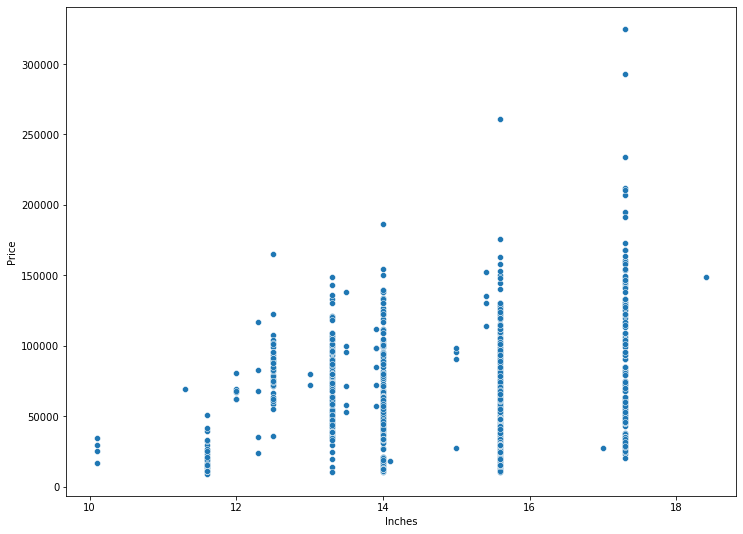

In [41]:
plt.figure(figsize=(12,9))
sns.scatterplot(x = df['Inches'],y = df['Price'])
plt.show()

In [42]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [43]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

## 3. Feature Extraction

### 3.1 Feature Extraction ScreenResolution Columns

In [45]:
df ['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [46]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
432,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i3 7130U 2.7GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.70,31914.7200,0
612,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,1TB HDD,Intel HD Graphics 520,Linux,2.18,23650.9920,0
918,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.60,71874.7200,0
1231,Razer,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,1TB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,186426.7200,0
1119,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,3.52,69929.4672,0


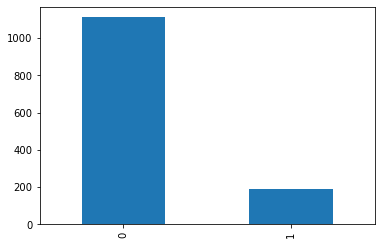

In [48]:
df ['Touchscreen'].value_counts().plot(kind = 'bar')
plt.show()

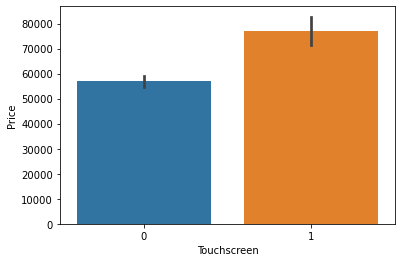

In [50]:
sns.barplot(x = df['Touchscreen'],y = df['Price'])
plt.show()

In [58]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [61]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
865,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.07,48484.80,0,0
243,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.56,46833.12,0,0
1230,Lenovo,Netbook,12.5,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.50GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,87912.00,1,1
467,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,2TB HDD,AMD Radeon 530,Windows 10,2.02,40439.52,0,0
359,Dell,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7300U 2.6GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.36,76030.56,0,0


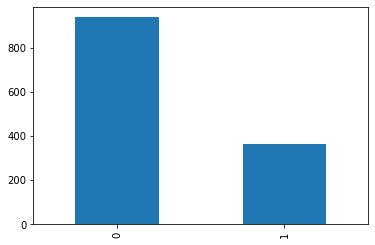

In [60]:
df['Ips'].value_counts().plot(kind = 'bar')
plt.show()

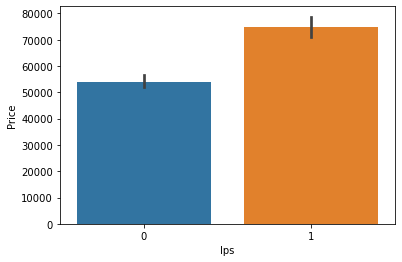

In [62]:
sns.barplot(x = df['Ips'],y = df['Price'])
plt.show()

In [63]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [64]:
df['X_Resolution']  = new[0]
df['Y_Resolution']  = new[1]

In [66]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_Resolution,Y_Resolution
907,Acer,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Celeron Dual Core 3205U 1.5GHz,4,16GB Flash Storage,Intel HD Graphics,Chrome OS,2.200,19127.520,0,1,IPS Panel Full HD 1920,1080
1015,Toshiba,Notebook,13.3,1366x768,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.500,64468.800,0,0,1366,768
713,Asus,Notebook,14.0,Full HD 1920x1080,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.500,15877.440,0,0,Full HD 1920,1080
670,Microsoft,Ultrabook,13.5,Touchscreen 2256x1504,Intel Core i7 7600U 2.8GHz,8,256GB SSD,Intel Iris Plus Graphics 640,Windows 10 S,1.252,99519.048,1,0,Touchscreen 2256,1504
925,Dell,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.950,38889.072,0,0,1366,768


In [67]:
df['X_Resolution'].str.replace(',',' ').str.findall(r'(\d+\.?\d+)')

0       [2560]
1       [1440]
2       [1920]
3       [2880]
4       [2560]
         ...  
1298    [1920]
1299    [3200]
1300    [1366]
1301    [1366]
1302    [1366]
Name: X_Resolution, Length: 1303, dtype: object

In [69]:
df['X_Resolution'] = df['X_Resolution'].str.replace(',',' ').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [70]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_Resolution,Y_Resolution
898,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R5 M420X,Windows 10,2.18,32713.92,0,0,1366,768
1017,Lenovo,Notebook,17.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 6820HQ 2.7GHz,16,512GB SSD,Nvidia Quadro 3000M,Windows 7,2.40,158135.04,0,1,3840,2160
1129,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 6300HQ 2.3GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.35,60153.12,0,1,1920,1080
308,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows 10,2.30,43636.32,0,0,1920,1080
1150,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,1TB HDD,Intel HD Graphics 520,No OS,1.90,18061.92,0,0,1366,768


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_Resolution      1303 non-null   object 
 14  Y_Resolution      1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


In [74]:
df['X_Resolution'] = df['X_Resolution'].astype('int32')
df['Y_Resolution'] = df['Y_Resolution'].astype('int32')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_Resolution      1303 non-null   int32  
 14  Y_Resolution      1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [76]:
df.corr()['Price']

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
Ips             0.252208
X_Resolution    0.556529
Y_Resolution    0.552809
Name: Price, dtype: float64

In [78]:
df['PPI'] = ((df['X_Resolution']**2) + (df['Y_Resolution']))**0.5 / df['Inches'].astype('float')

In [79]:
df.corr()['Price']

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
Ips             0.252208
X_Resolution    0.556529
Y_Resolution    0.552809
PPI             0.474960
Name: Price, dtype: float64

In [80]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [81]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_Resolution,Y_Resolution,PPI
1005,HP,Notebook,14.0,Intel Core i5 6300U 2.4GHz,4,256GB SSD,Intel HD Graphics 520,Windows 10,1.48,58607.4672,0,0,1366,768,97.591506


In [82]:
df.drop(columns=['Inches','X_Resolution','Y_Resolution'],inplace=True)

### 3.2 Feature Extraction CPU Columns

In [85]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,192.504698
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,108.294170
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,123.094951
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,187.033278
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,192.504698


In [86]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     134
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core i7 7700HQ 2.7GHz      1
AMD A12-Series 9700P 2.5GHz      1
AMD A4-Series 7210 2.2GHz        1
AMD FX 9830P 3GHz                1
Intel Core i7 6560U 2.2GHz       1
Name: Cpu, Length: 118, dtype: int64

In [89]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [91]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu Name
150,Dell,Gaming,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.56,66560.5728,0,0,123.094951,Intel Core i7
873,Lenovo,Notebook,Intel Core i3 7100U 2.4GHz,4,180GB SSD,Intel HD Graphics 620,Windows 10,1.44,39160.8000,0,1,144.382047,Intel Core i3
63,Asus,Notebook,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.40,50136.4800,0,0,137.162945,Intel Core i5
456,Dell,Notebook,Intel Core i7 7700HQ 2.7GHz,8,1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42,109010.8800,0,1,110.998915,Intel Core i7
638,Lenovo,2 in 1 Convertible,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.37,93635.3376,1,1,144.382047,Intel Core i7


In [92]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'AMD Processor'
            

In [93]:
df['Cpu Brand'] = df['Cpu Name'].apply(fetch_processor)

In [95]:
df['Cpu Brand'].value_counts()

Intel Core i7    527
Intel Core i5    423
AMD Processor    154
Intel Core i3    136
Name: Cpu Brand, dtype: int64

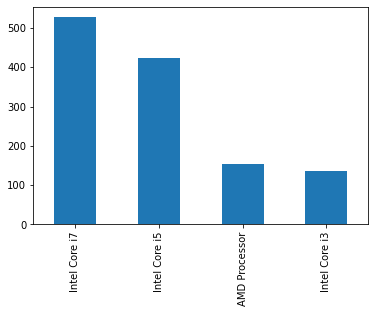

In [97]:
df['Cpu Brand'].value_counts().plot(kind = 'bar')
plt.show()

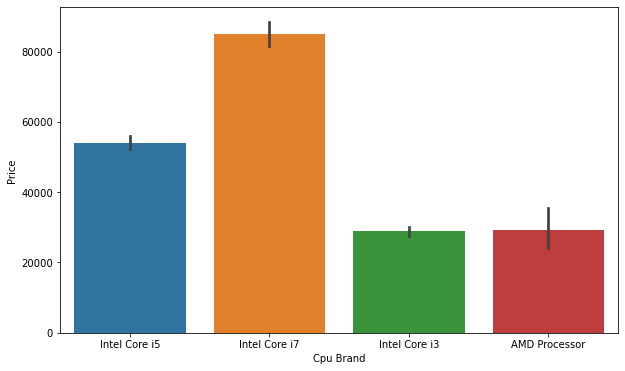

In [100]:
plt.figure(figsize=(10,6))
sns.barplot(x = df['Cpu Brand'],y = df['Price'])
plt.show()

In [101]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [103]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu Brand
794,Apple,Ultrabook,8,512GB Flash Storage,Intel HD Graphics 5300,Mac OS X,0.92,62071.2000,0,1,192.026040,AMD Processor
410,Lenovo,Workstation,8,512GB SSD,Nvidia Quadro M1200,Windows 10,2.67,102564.0000,0,0,123.094951,Intel Core i7
1178,MSI,Gaming,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 970M,Windows 10,1.91,114731.5536,0,0,123.094951,Intel Core i7
879,HP,Notebook,4,256GB SSD,Intel HD Graphics 620,Windows 10,2.04,44701.9200,0,0,123.094951,Intel Core i5
819,Dell,Notebook,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.76,40226.4000,0,0,97.591506,Intel Core i5


## 3.3 Feature Extraction RAM

In [104]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,192.504698,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,108.294170,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,123.094951,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,187.033278,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,192.504698,Intel Core i5


In [106]:
df['Ram'].value_counts()

8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: Ram, dtype: int64

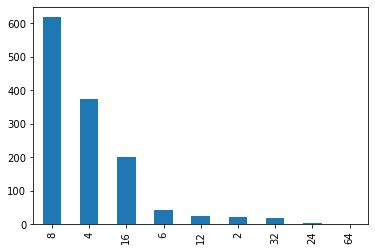

In [107]:
df['Ram'].value_counts().plot(kind = 'bar')
plt.show()

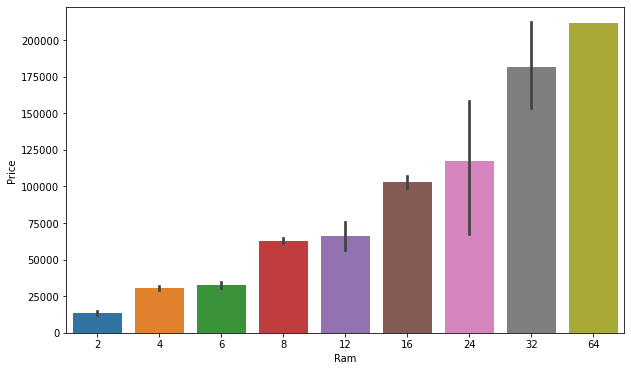

In [108]:
plt.figure(figsize=(10,6))
sns.barplot(x = df['Ram'],y = df['Price'])
plt.show()

## 3.4 Feature Extraction Memory

In [109]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,192.504698,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,108.294170,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,123.094951,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,187.033278,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,192.504698,Intel Core i5


In [110]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
128GB SSD +  2TB HDD               2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
240GB SSD                          1
2

In [111]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

In [114]:
new.sample(5)

,0,1
473,256 SSD,None
249,512 SSD,None
159,500 HDD,None
624,500 HDD,None
122,256 SSD,None


In [115]:
df["first"]= new[0]
df["first"]=df["first"].str.strip()

In [116]:
df["second"]= new[1]

In [117]:
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [118]:
df.sample()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu Brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
814,Dell,Notebook,8,256 SSD,AMD Radeon R5 M420,Windows 10,2.18,42081.0768,0,0,123.094951,Intel Core i5,256 SSD,None,0,1,0,0


In [119]:
df['first'] = df['first'].str.replace(r'\D', '')

In [120]:
df["second"].fillna("0", inplace = True)

In [121]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [122]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
662,Lenovo,Notebook,4,500 HDD,Intel HD Graphics 520,Windows 10,2.20,28504.80,0,0,...,500,0,1,0,0,0,0,0,0,0
253,Lenovo,2 in 1 Convertible,8,512 SSD,Intel UHD Graphics 620,Windows 10,1.37,98514.72,1,1,...,512,0,0,1,0,0,0,0,0,0
1252,Lenovo,Notebook,6,128 SSD,Nvidia GeForce 920MX,Windows 10,2.40,30316.32,0,0,...,128,0,0,1,0,0,0,0,0,0
807,HP,Notebook,8,2000 HDD,AMD Radeon R7 Graphics,Windows 10,2.04,33513.12,0,0,...,2000,0,1,0,0,0,0,0,0,0
122,Lenovo,Notebook,8,256 SSD,Nvidia GeForce 940MX,No OS,2.20,33513.12,0,0,...,256,0,0,1,0,0,0,0,0,0


In [123]:
df['second'] = df['second'].str.replace(r'\D', '')

In [124]:
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1303 non-null   object 
 1   TypeName             1303 non-null   object 
 2   Ram                  1303 non-null   int32  
 3   Memory               1303 non-null   object 
 4   Gpu                  1303 non-null   object 
 5   OpSys                1303 non-null   object 
 6   Weight               1303 non-null   float32
 7   Price                1303 non-null   float64
 8   Touchscreen          1303 non-null   int64  
 9   Ips                  1303 non-null   int64  
 10  PPI                  1303 non-null   float64
 11  Cpu Brand            1240 non-null   object 
 12  first                1303 non-null   int32  
 13  second               1303 non-null   int32  
 14  Layer1HDD            1303 non-null   int64  
 15  Layer1SSD            1303 non-null   i

In [126]:
df["HDD"] = (df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"] = (df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"] = (df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

In [127]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,...,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,HDD,SSD,Hybrid,Flash_Storage
1063,Dell,Notebook,16,2000 HDD,AMD Radeon R7 M445,Windows 10,2.32,52746.6672,0,0,...,0,0,0,0,0,0,2000,0,0,0
328,HP,Ultrabook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.26,71128.8000,0,0,...,0,0,0,0,0,0,0,256,0,0
1262,Dell,Notebook,6,1000 HDD,Intel HD Graphics 620,Windows 10,2.30,24455.5200,0,0,...,0,0,0,0,0,0,1000,0,0,0
1288,Asus,Notebook,4,500 HDD,Intel HD Graphics,Windows 10,2.20,19660.3200,0,0,...,0,0,0,0,0,0,500,0,0,0
335,HP,Notebook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.48,67559.0400,0,0,...,0,0,0,0,0,0,0,256,0,0


In [128]:
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Ram            1303 non-null   int32  
 3   Memory         1303 non-null   object 
 4   Gpu            1303 non-null   object 
 5   OpSys          1303 non-null   object 
 6   Weight         1303 non-null   float32
 7   Price          1303 non-null   float64
 8   Touchscreen    1303 non-null   int64  
 9   Ips            1303 non-null   int64  
 10  PPI            1303 non-null   float64
 11  Cpu Brand      1240 non-null   object 
 12  HDD            1303 non-null   int64  
 13  SSD            1303 non-null   int64  
 14  Hybrid         1303 non-null   int64  
 15  Flash_Storage  1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(6), object(6)
memory usage: 152.8+ KB


In [130]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
549,Lenovo,Notebook,8,512 SSD,Intel HD Graphics 620,Windows 10,1.99,92121.1200,0,1,123.094951,Intel Core i7,0,512,0,0
56,HP,Notebook,4,128 SSD,Intel HD Graphics 520,Windows 10,1.91,23389.9200,0,0,123.094951,Intel Core i3,0,128,0,0
1285,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,240.622649,Intel Core i7,0,512,0,0
841,Dell,Gaming,32,512 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,163723.5792,0,1,110.998915,Intel Core i7,1000,512,0,0
973,Toshiba,Notebook,8,256 SSD,Intel HD Graphics 520,Windows 10,1.95,62870.4000,0,0,137.162945,Intel Core i5,0,256,0,0


In [131]:
df.drop(columns=['Memory'],inplace = True)

In [132]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Gpu', 'OpSys', 'Weight', 'Price',
       'Touchscreen', 'Ips', 'PPI', 'Cpu Brand', 'HDD', 'SSD', 'Hybrid',
       'Flash_Storage'],
      dtype='object')

In [134]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
PPI              0.474960
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [135]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [136]:
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu Brand,HDD,SSD
116,HP,Notebook,8,Intel UHD Graphics 620,Windows 10,1.63,57755.52,0,0,137.162945,Intel Core i7,0,512
1044,HP,Notebook,4,Intel HD Graphics 520,Windows 10,1.54,53280.00,0,0,137.162945,Intel Core i5,500,0
1225,Asus,Notebook,4,Intel HD Graphics 405,Windows 10,2.65,16463.52,0,0,87.582121,AMD Processor,1000,0
1113,HP,Ultrabook,8,Intel HD Graphics 520,Windows 10,1.16,104908.32,0,0,144.382047,Intel Core i7,0,512
625,Lenovo,Notebook,8,Nvidia GeForce 920MX,Windows 10,2.20,47898.72,0,0,123.094951,Intel Core i7,1000,0


## 3.5 Feature Extraction  GPU

In [137]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,192.504698,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,108.294170,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,123.094951,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,187.033278,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,192.504698,Intel Core i5,0,256


In [138]:
df['Gpu'].value_counts()

Intel HD Graphics 620       281
Intel HD Graphics 520       185
Intel UHD Graphics 620       68
Nvidia GeForce GTX 1050      66
Nvidia GeForce GTX 1060      48
                           ... 
Intel Iris Graphics 550       1
Nvidia Quadro M3000M          1
Nvidia GeForce 960M           1
Nvidia Quadro M620M           1
Nvidia GeForce GTX 930MX      1
Name: Gpu, Length: 110, dtype: int64

In [139]:
df['Gpu_Brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [140]:
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu Brand,HDD,SSD,Gpu_Brand
90,Asus,Gaming,8,AMD Radeon RX 560,Windows 10,2.45,37242.72,0,0,123.094951,None,1000,0,AMD
891,HP,2 in 1 Convertible,16,Intel HD Graphics 620,Windows 10,1.42,74538.72,1,0,240.622649,Intel Core i7,0,256,Intel
74,Acer,Notebook,8,Intel HD Graphics 520,Windows 10,2.10,20725.92,0,0,97.591506,Intel Core i3,1000,0,Intel
451,Dell,Workstation,16,Nvidia Quadro M620,Windows 10,2.17,105228.00,0,1,123.094951,Intel Core i7,0,256,Nvidia
35,Lenovo,Notebook,4,Intel HD Graphics 500,Windows 10,1.44,13266.72,0,0,97.591506,AMD Processor,0,0,Intel


In [141]:
df['Gpu_Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_Brand, dtype: int64

In [144]:
df[df['Gpu_Brand'] == 'ARM']

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu Brand,HDD,SSD,Gpu_Brand
1191,Samsung,2 in 1 Convertible,4,ARM Mali T860 MP4,Chrome OS,1.15,35111.52,1,1,195.14905,None,0,0,ARM


In [145]:
df = df[df['Gpu_Brand'] != 'ARM']

In [146]:
df

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu Brand,HDD,SSD,Gpu_Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,192.504698,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,108.294170,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,123.094951,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,187.033278,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,192.504698,Intel Core i5,0,256,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,137.162945,Intel Core i7,0,128,Intel
1299,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,240.622649,Intel Core i7,0,512,Intel
1300,Lenovo,Notebook,2,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,97.591506,AMD Processor,0,0,Intel
1301,HP,Notebook,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,87.582121,Intel Core i7,1000,0,AMD


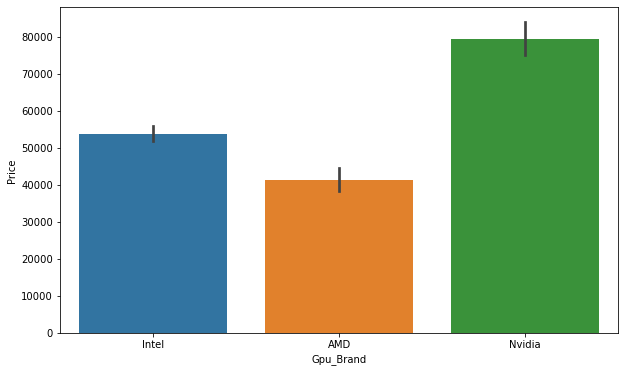

In [147]:
plt.figure(figsize=(10,6))
sns.barplot(x = df['Gpu_Brand'],y = df['Price'])
plt.show()

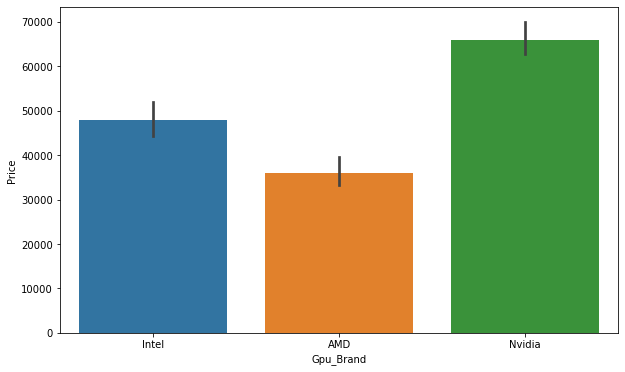

In [148]:
plt.figure(figsize=(10,6))
sns.barplot(x = df['Gpu_Brand'],y = df['Price'],estimator= np.median)
plt.show()

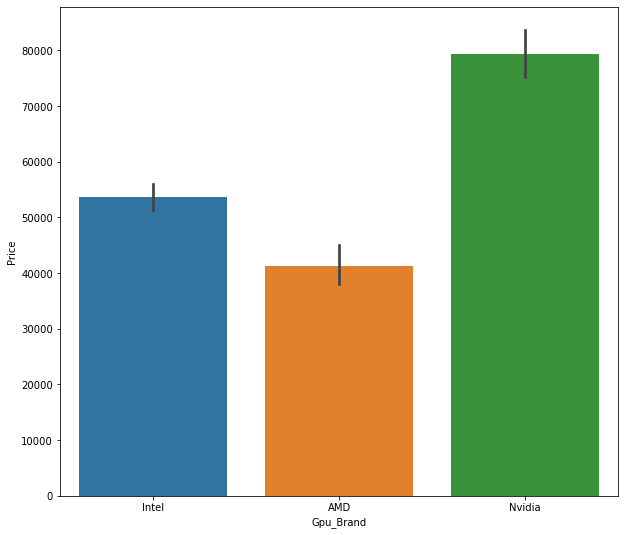

In [152]:
plt.figure(figsize = (10,9))
sns.barplot(x = df['Gpu_Brand'],y = df['Price'])
plt.show()

In [153]:
df.drop(columns=['Gpu'],inplace=True)

## 3.6 Feature Extraction Operating System

In [154]:
df.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu Brand,HDD,SSD,Gpu_Brand
414,Asus,2 in 1 Convertible,8,Windows 10,1.27,49443.8400,1,1,144.382047,Intel Core i5,0,256,Intel
885,HP,2 in 1 Convertible,4,Windows 10,1.28,95850.7200,1,0,144.382047,Intel Core i5,0,256,Intel
543,Acer,Gaming,8,Linux,2.40,42517.4400,0,0,123.094951,Intel Core i5,1000,0,Nvidia
1281,Dell,Notebook,8,Linux,2.30,42943.1472,0,0,87.582121,Intel Core i7,1000,0,AMD
777,Acer,Notebook,4,Windows 10,1.80,33886.0800,0,1,137.162945,Intel Core i3,0,128,Intel


In [156]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Windows 10 S       8
Mac OS X           8
Android            2
Name: OpSys, dtype: int64

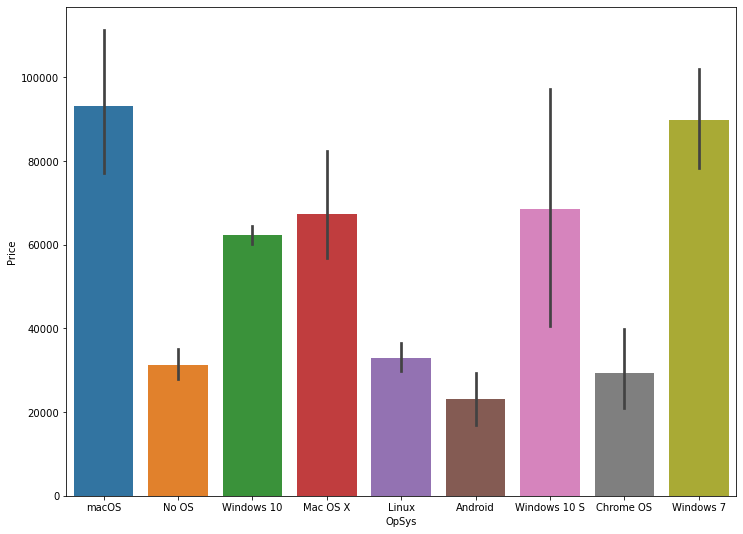

In [158]:
plt.figure(figsize = (12,9))
sns.barplot(x = df['OpSys'],y = df['Price'])
plt.show()

In [172]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Other/No OS/Linux'

In [173]:
df['OS'] = df['OpSys'].apply(cat_os)

In [174]:
df

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu Brand,HDD,SSD,Gpu_Brand,OS
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,192.504698,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,108.294170,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,123.094951,Intel Core i5,0,256,Intel,Other/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,187.033278,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,192.504698,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows 10,1.80,33992.6400,1,1,137.162945,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,Windows 10,1.30,79866.7200,1,1,240.622649,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,Windows 10,1.50,12201.1200,0,0,97.591506,AMD Processor,0,0,Intel,Windows
1301,HP,Notebook,6,Windows 10,2.19,40705.9200,0,0,87.582121,Intel Core i7,1000,0,AMD,Windows


In [175]:
df['OS'].unique()

array(['Mac', 'Other/No OS/Linux', 'Windows'], dtype=object)

In [177]:
df.drop(columns=['OpSys'],inplace=True)

In [178]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'PPI', 'Cpu Brand', 'HDD', 'SSD', 'Gpu_Brand', 'OS'],
      dtype='object')

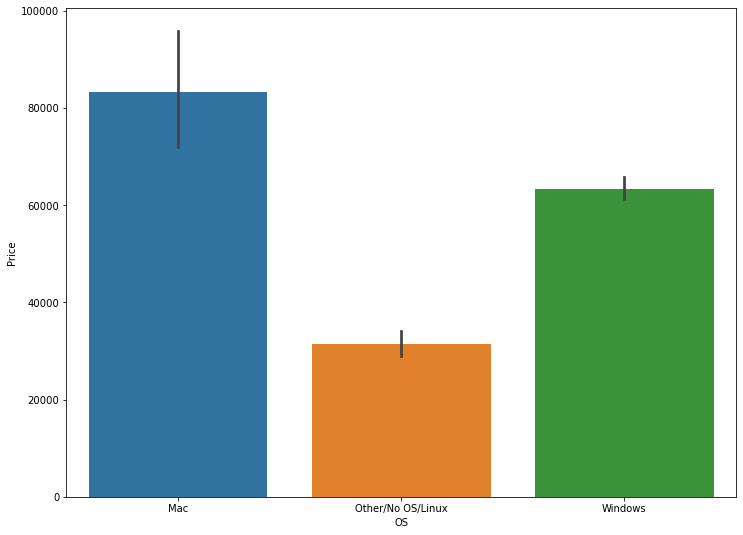

In [179]:
plt.figure(figsize = (12,9))
sns.barplot(x = df['OS'],y = df['Price'])
plt.show()

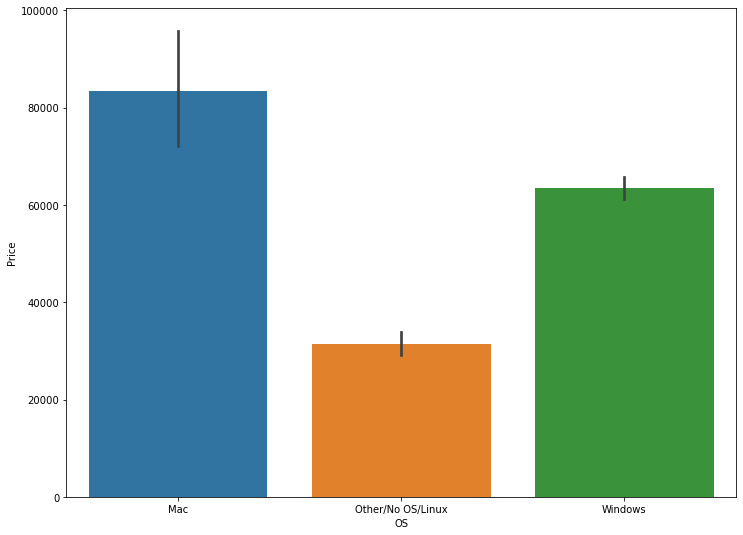

In [180]:
plt.figure(figsize = (12,9))
sns.barplot(x = df['OS'],y = df['Price'])
plt.show()

## 3.7 Feature Extraction Weight

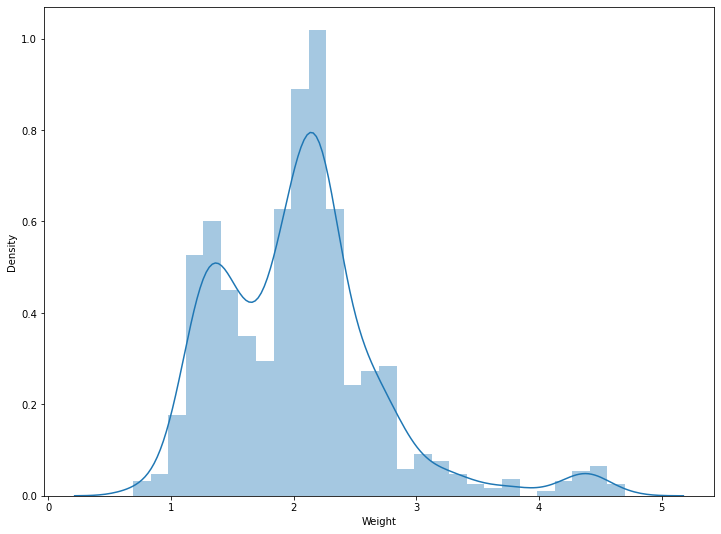

In [182]:
plt.figure(figsize = (12,9))
sns.distplot(df['Weight'])
plt.show()

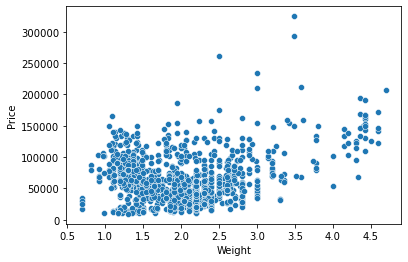

In [184]:
sns.scatterplot(x= df['Weight'],y = df['Price'])
plt.show()

In [185]:
df.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
PPI            0.476565
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

In [186]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,PPI,Cpu Brand,HDD,SSD,Gpu_Brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,192.504698,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,108.294170,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,123.094951,Intel Core i5,0,256,Intel,Other/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,187.033278,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,192.504698,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,137.162945,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,240.622649,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,97.591506,AMD Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,87.582121,Intel Core i7,1000,0,AMD,Windows


<AxesSubplot:>

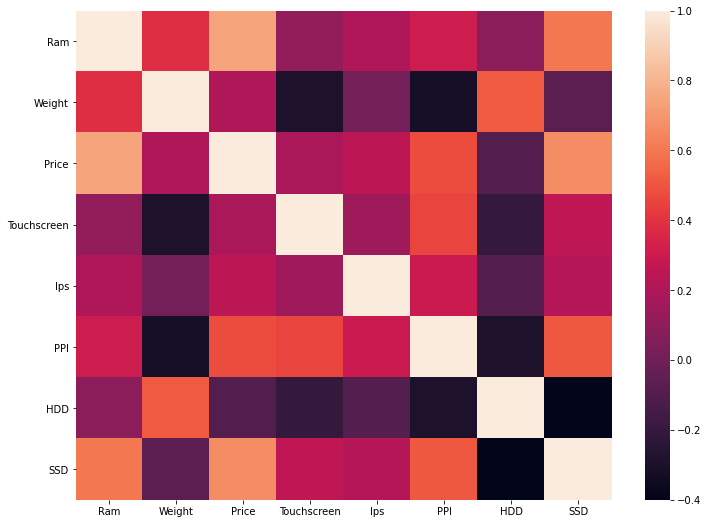

In [188]:
plt.figure(figsize = (12,9))
sns.heatmap(df.corr())

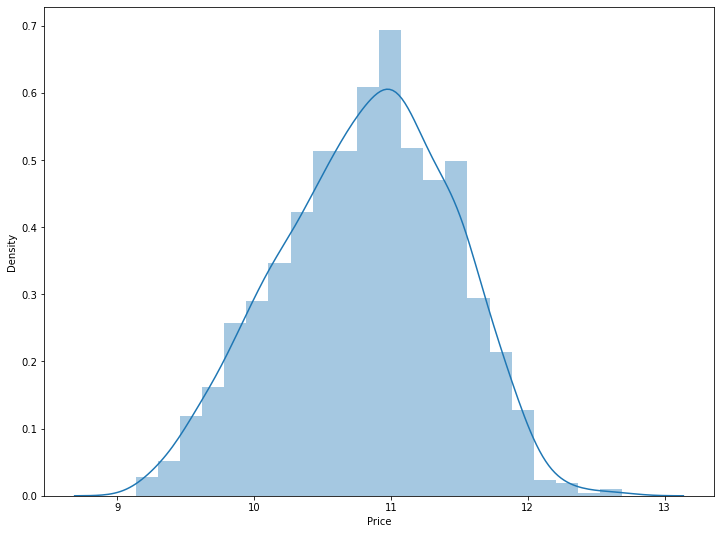

In [192]:
plt.figure(figsize = (12,9))
sns.distplot(np.log(df['Price']))
plt.show()

## 4. Train and test Split

In [194]:
df.sample(5)

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,PPI,Cpu Brand,HDD,SSD,Gpu_Brand,OS
148,MSI,Gaming,16,2.90,108105.120,0,0,110.998915,Intel Core i7,1000,256,Nvidia,Windows
325,Lenovo,Notebook,4,1.44,15557.760,0,0,97.591506,AMD Processor,0,0,Intel,Windows
589,Asus,Gaming,8,2.73,94305.600,0,1,110.998915,Intel Core i5,1000,128,Nvidia,Windows
949,Acer,Notebook,4,1.68,18594.720,0,0,97.591506,AMD Processor,0,0,Intel,Other/No OS/Linux
887,Asus,Gaming,12,2.20,72988.272,0,0,110.998915,Intel Core i5,1000,128,Nvidia,Windows


In [195]:
X = df.drop(columns='Price')

In [232]:
y = np.log(df['Price'])

In [233]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [234]:
x_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,PPI,Cpu Brand,HDD,SSD,Gpu_Brand,OS
183,Toshiba,Notebook,8,2.00,0,0,87.582121,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,123.094951,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,117.782852,AMD Processor,0,0,Intel,Other/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,123.094951,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,123.094951,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,87.582121,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,123.094951,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,87.582121,None,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,87.582121,Intel Core i3,2000,0,Nvidia,Other/No OS/Linux


## 5. Columns Transformation

In [235]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [236]:
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,LarsCV,Lasso,ElasticNet,ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

## Model Complete

## Algorithms: 1 Linear Regression

In [237]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop = 'first'),[0,1,7,10,11])
],remainder='passthrough')

model = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('model',model)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('r2_score',r2_score(y_test,y_pred))

print('MAE',mean_absolute_error(y_test,y_pred))

r2_score 0.8073257429251366
MAE 0.21022213019402697


## Algorithms: 2 Ridge Regression

In [239]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop = 'first'),[0,1,7,10,11])
],remainder='passthrough')

model = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('model',model)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('r2_score',r2_score(y_test,y_pred))

print('MAE',mean_absolute_error(y_test,y_pred))

r2_score 0.817746421707001
MAE 0.20586200939398738


## Algorithms: 3 Lasso Regression

In [241]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop = 'first'),[0,1,7,10,11])
],remainder='passthrough')

model = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('model',model)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('r2_score',r2_score(y_test,y_pred))

print('MAE',mean_absolute_error(y_test,y_pred))

r2_score 0.8112404994144836
MAE 0.20935783068760985


## Algorithms: 4 KNN Regression

In [242]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop = 'first'),[0,1,7,10,11])
],remainder='passthrough')

model = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('model',model)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('r2_score',r2_score(y_test,y_pred))

print('MAE',mean_absolute_error(y_test,y_pred))

r2_score 0.8048227486424622
MAE 0.1926855956907232


## Algorithms: 5 Decission Tree Regression

In [243]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop = 'first'),[0,1,7,10,11])
],remainder='passthrough')

model = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('model',model)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('r2_score',r2_score(y_test,y_pred))

print('MAE',mean_absolute_error(y_test,y_pred))

r2_score 0.8318801779453878
MAE 0.18356584142893584


## Algorithms: 6 SVR

In [245]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop = 'first'),[0,1,7,10,11])
],remainder='passthrough')

model = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('model',model)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('r2_score',r2_score(y_test,y_pred))

print('MAE',mean_absolute_error(y_test,y_pred))

r2_score 0.8084525177721129
MAE 0.20215678980962595


## Algorithms: 7 Random Forest

In [246]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop = 'first'),[0,1,7,10,11])
],remainder='passthrough')

model =  RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('model',model)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('r2_score',r2_score(y_test,y_pred))

print('MAE',mean_absolute_error(y_test,y_pred))

r2_score 0.8937613358357559
MAE 0.1548578922490247


## Algorithms: 8 Extra Tree

In [247]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop = 'first'),[0,1,7,10,11])
],remainder='passthrough')

model =  ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('model',model)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('r2_score',r2_score(y_test,y_pred))

print('MAE',mean_absolute_error(y_test,y_pred))

r2_score 0.8798683265914967
MAE 0.1584617135526403


## Algorithms: 9 AdaBoost

In [248]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop = 'first'),[0,1,7,10,11])
],remainder='passthrough')

model = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('model',model)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('r2_score',r2_score(y_test,y_pred))

print('MAE',mean_absolute_error(y_test,y_pred))

r2_score 0.807204743641268
MAE 0.21924856845746588


## Algorithms: 10 Gradient Boost

In [251]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop = 'first'),[0,1,7,10,11])
],remainder='passthrough')

model = GradientBoostingRegressor(n_estimators=5001)

pipe = Pipeline([
    ('step1',step1),
    ('model',model)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('r2_score',r2_score(y_test,y_pred))

print('MAE',mean_absolute_error(y_test,y_pred))

r2_score 0.872594490871787
MAE 0.15891010527548438


## Algorithms: 11 XgBoost

In [253]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop = 'first'),[0,1,7,10,11])
],remainder='passthrough')

model = XGBRegressor(n_estimators=45,max_depth = 5,learning_rate = 0.5)

pipe = Pipeline([
    ('step1',step1),
    ('model',model)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('r2_score',r2_score(y_test,y_pred))

print('MAE',mean_absolute_error(y_test,y_pred))

r2_score 0.8981890781776906
MAE 0.1481811056244932


## Algorithms: 12 Voting Regressor

In [254]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8954229777074436
MAE 0.15573958331193527


## Algorithms: 13 Stacking Regressor

In [255]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8840115405847996
MAE 0.16721634281306597


## Model Export Final Model

In [256]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop = 'first'),[0,1,7,10,11])
],remainder='passthrough')

model =  RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('model',model)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('r2_score',r2_score(y_test,y_pred))

print('MAE',mean_absolute_error(y_test,y_pred))

r2_score 0.8937613358357559
MAE 0.1548578922490247


In [257]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))